**Regression Task**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**1. Exploratory Data Analysis (EDA)**

i. Data Cleaning and Summary Statics


In [99]:


# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Final Assesment of AI/Traffic.csv")


In [87]:
# Data Cleaning

df.head(10)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,2025-02-11 00:00:00,10,Tuesday,31,0,4,4,39,low
1,2025-02-11 00:15:00,10,Tuesday,49,0,3,3,55,low
2,2025-02-11 00:30:00,10,Tuesday,46,0,3,6,55,low
3,2025-02-11 00:45:00,10,Tuesday,51,0,2,5,58,low
4,2025-02-11 01:00:00,10,Tuesday,57,6,15,16,94,normal
5,2025-02-11 01:15:00,10,Tuesday,44,0,5,4,53,low
6,2025-02-11 01:30:00,10,Tuesday,37,0,1,4,42,low
7,2025-02-11 01:45:00,10,Tuesday,42,4,4,5,55,low
8,2025-02-11 02:00:00,10,Tuesday,51,0,9,7,67,low
9,2025-02-11 02:15:00,10,Tuesday,34,0,4,7,45,low


In [93]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


In [94]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)


Duplicate Rows:
 Empty DataFrame
Columns: [Time, Date, Day of the week, CarCount, BikeCount, BusCount, TruckCount, Total, Traffic Situation]
Index: []


In [95]:

# Check the data types
data_types = df.dtypes
print("Data Types:\n", data_types)

Data Types:
 Time                 datetime64[ns]
Date                          int64
Day of the week              object
CarCount                      int64
BikeCount                     int64
BusCount                      int64
TruckCount                    int64
Total                         int64
Traffic Situation            object
dtype: object


In [97]:
# Summary Statistics
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)



Summary Statistics:
                                 Time         Date     CarCount    BikeCount  \
count                           2976  2976.000000  2976.000000  2976.000000   
mean   2025-02-11 11:52:29.999999744    16.000000    68.696573    14.917339   
min              2025-02-11 00:00:00     1.000000     6.000000     0.000000   
25%              2025-02-11 05:56:15     8.000000    19.000000     5.000000   
50%              2025-02-11 11:52:30    16.000000    64.000000    12.000000   
75%              2025-02-11 17:48:45    24.000000   107.000000    22.000000   
max              2025-02-11 23:45:00    31.000000   180.000000    70.000000   
std                              NaN     8.945775    45.850693    12.847518   

          BusCount   TruckCount        Total  
count  2976.000000  2976.000000  2976.000000  
mean     15.279570    15.324933   114.218414  
min       0.000000     0.000000    21.000000  
25%       1.000000     6.000000    55.000000  
50%      12.000000    14.000000

In [98]:
# Correlation matrix (for numeric columns)
numeric_df = df.select_dtypes(include=['number'])  # Select numeric columns
correlation_matrix = numeric_df.corr()            # Calculate correlation for numeric columns only
print("\nCorrelation Matrix:\n", correlation_matrix)



Correlation Matrix:
                 Date  CarCount  BikeCount  BusCount  TruckCount     Total
Date        1.000000 -0.013453  -0.005089 -0.015536    0.024734 -0.010679
CarCount   -0.013453  1.000000   0.722539  0.692994   -0.628157  0.970443
BikeCount  -0.005089  0.722539   1.000000  0.566364   -0.575399  0.797429
BusCount   -0.015536  0.692994   0.566364  1.000000   -0.546931  0.790705
TruckCount  0.024734 -0.628157  -0.575399 -0.546931    1.000000 -0.555471
Total      -0.010679  0.970443   0.797429  0.790705   -0.555471  1.000000


ii. Exploratory Data Analysis through Visualizations

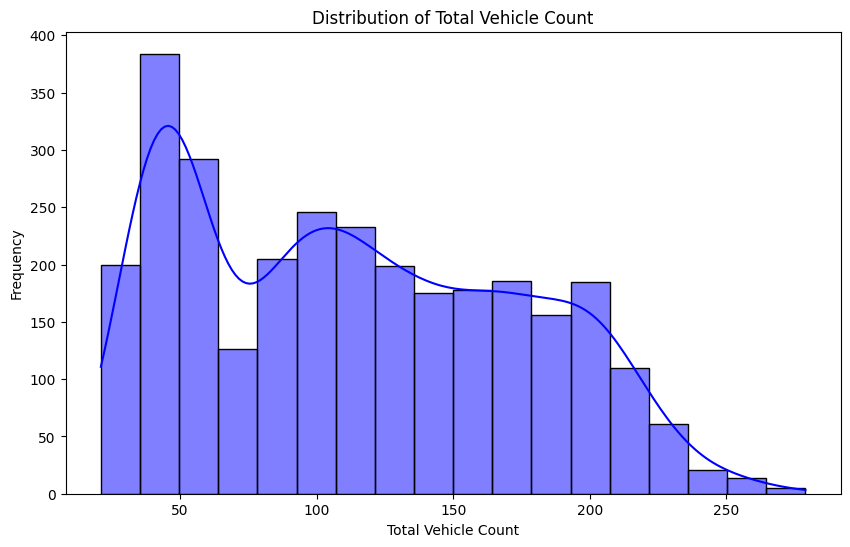

In [104]:


# Set the figure size for all plots
plt.figure(figsize=(10, 6))

# Histogram of the target variable (Total Vehicle Count)
sns.histplot(df['Total'], kde=True, color='blue')
plt.title("Distribution of Total Vehicle Count")
plt.xlabel("Total Vehicle Count")
plt.ylabel("Frequency")
plt.show()



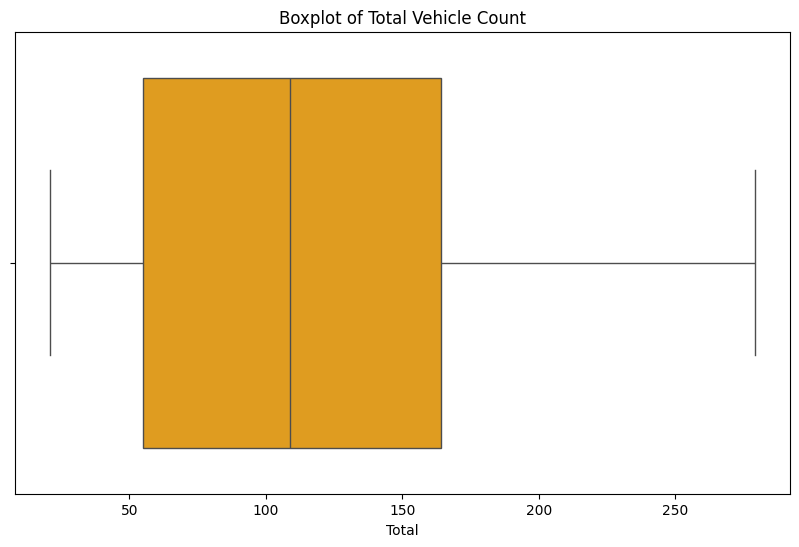

In [57]:
# Box plot to check for outliers in the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total'], color='orange')
plt.title("Boxplot of Total Vehicle Count")
plt.show()


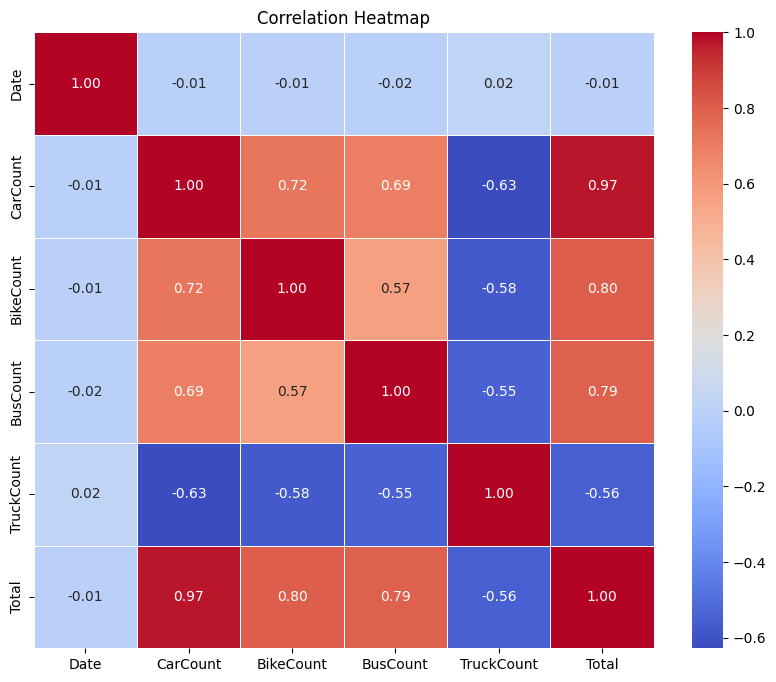

In [58]:
# Correlation matrix
numeric_df = df.select_dtypes(include=['number'])  # Select numeric columns
correlation_matrix = numeric_df.corr()            # Calculate correlation for numeric columns only

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-59-3413c6446afb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


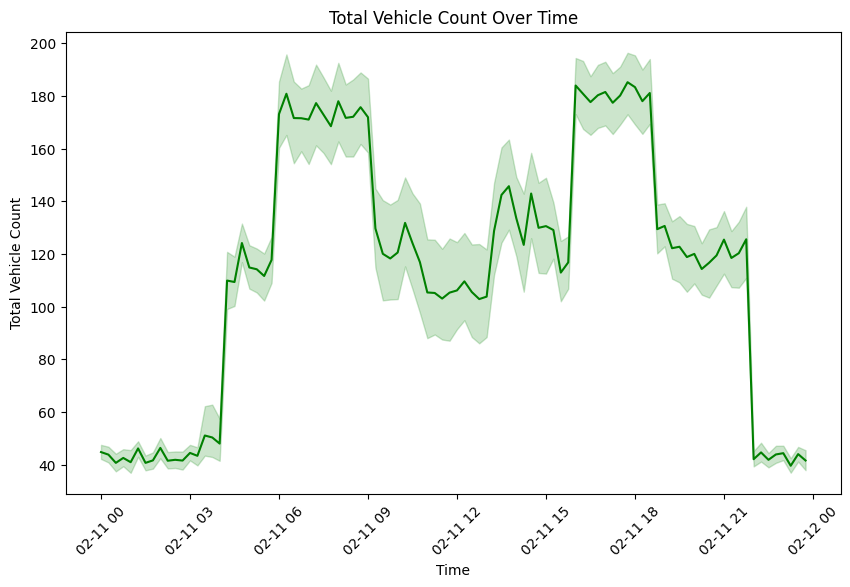

In [59]:
# Ensure 'timestamp' is a datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Time Series Plot for Total Vehicle Count over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Time'], y=df['Total'], color='green')
plt.title("Total Vehicle Count Over Time")
plt.xlabel("Time")
plt.ylabel("Total Vehicle Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


Histogram: Helps you understand the general distribution of the target variable.

Box Plot: A quick way to spot outliers and see the spread of data.

Correlation Heatmap: Visualizes relationships between numerical variables and helps in feature selection.

Time Series Plot: Provides a clear picture of trends and seasonality over time, which is crucial for time-sensitive tasks like traffic prediction.


**2. Build a Linear Regression model from scratch**

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [110]:

# Data cleaning (drop rows with missing target variable)
df = df.dropna(subset=['Total'])

# Feature selection (excluding 'Total' as it's the target variable)
X = df.drop(['Total', 'Time'], axis=1)  # Drop the 'Time' column and 'Total' column (target)
y = df['Total']

# One-Hot Encoding for categorical variables (e.g., 'Day')
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature scaling (Standardizing the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a column of ones to the feature matrix for the intercept term
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Linear Regression with Ridge Regularization (from scratch)
def ridge_regression(X, y, alpha=1.0):
    """
    Perform Ridge Regression using the Normal Equation with L2 regularization.
    Args:
        X: Feature matrix
        y: Target variable
        alpha: Regularization strength (lambda)
    Returns:
        theta: Model coefficients
    """
    # Calculate the theta using the Normal Equation with Ridge Regularization
    theta = np.linalg.inv(X.T.dot(X) + alpha * np.identity(X.shape[1])).dot(X.T).dot(y)
    return theta

# Train the model with Ridge regularization
alpha = 1.0  # Regularization strength (adjustable)
theta = ridge_regression(X_train_scaled, y_train, alpha)

# Make predictions on the train and test sets
y_train_pred = X_train_scaled.dot(theta)
y_test_pred = X_test_scaled.dot(theta)

# Model Evaluation: MSE and R-squared on both train and test sets

# Training Set Evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Testing Set Evaluation
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Output the results
print("Training Set Evaluation:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared: {r2_train}")

print("\nTesting Set Evaluation:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared: {r2_test}")


Training Set Evaluation:
Mean Squared Error: 0.0042444833805229025
R-squared: 0.9999988480065397

Testing Set Evaluation:
Mean Squared Error: 0.004451069460340637
R-squared: 0.9999986795360736


**3. Build a Primary Model**

i. Split the Dataset

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
# Data cleaning (drop rows with missing target variable)
df = df.dropna(subset=['Total'])

# Feature selection (excluding 'Total' as it's the target variable)
X = df.drop(['Total', 'Time'], axis=1)  # Drop the 'Time' column and 'Total' column (target)
y = df['Total']

# One-Hot Encoding for categorical variables (e.g., 'Day')
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


ii. Build Two Models

a. Linear Regression from Scratch


In [113]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [114]:


# Feature scaling (Standardizing the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a column of ones to the feature matrix for the intercept term
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Linear Regression from scratch (Normal Equation)
def linear_regression(X, y):
    # Calculate the theta using the Normal Equation
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# Train the model
theta = linear_regression(X_train_scaled, y_train)

# Make predictions
y_train_pred = X_train_scaled.dot(theta)
y_test_pred = X_test_scaled.dot(theta)


b. Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_train_pred = rf_model.predict(X_train)
rf_y_test_pred = rf_model.predict(X_test)


**iii.  Model Evaluation for Linear Regression**

In [64]:
# Linear Regression Evaluation Metrics

# Training Set Evaluation
mse_train_lr = mean_squared_error(y_train, y_train_pred)
mae_train_lr = mean_absolute_error(y_train, y_train_pred)
r2_train_lr = r2_score(y_train, y_train_pred)

# Testing Set Evaluation
mse_test_lr = mean_squared_error(y_test, y_test_pred)
mae_test_lr = mean_absolute_error(y_test, y_test_pred)
r2_test_lr = r2_score(y_test, y_test_pred)

print("Linear Regression Evaluation:")
print(f"Training Set MSE: {mse_train_lr}, MAE: {mae_train_lr}, R²: {r2_train_lr}")
print(f"Testing Set MSE: {mse_test_lr}, MAE: {mae_test_lr}, R²: {r2_test_lr}")


Linear Regression Evaluation:
Training Set MSE: 1.335529155928019e-25, MAE: 3.404066944290016e-13, R²: 1.0
Testing Set MSE: 1.2955963493703964e-25, MAE: 3.338835546593518e-13, R²: 1.0


**iv.Model Evaluation for Random Forest**

In [65]:
# Random Forest Evaluation Metrics

# Training Set Evaluation
mse_train_rf = mean_squared_error(y_train, rf_y_train_pred)
mae_train_rf = mean_absolute_error(y_train, rf_y_train_pred)
r2_train_rf = r2_score(y_train, rf_y_train_pred)

# Testing Set Evaluation
mse_test_rf = mean_squared_error(y_test, rf_y_test_pred)
mae_test_rf = mean_absolute_error(y_test, rf_y_test_pred)
r2_test_rf = r2_score(y_test, rf_y_test_pred)

print("\nRandom Forest Evaluation:")
print(f"Training Set MSE: {mse_train_rf}, MAE: {mae_train_rf}, R²: {r2_train_rf}")
print(f"Testing Set MSE: {mse_test_rf}, MAE: {mae_test_rf}, R²: {r2_test_rf}")



Random Forest Evaluation:
Training Set MSE: 2.2090906302521005, MAE: 1.0268025210084033, R²: 0.9994004316353692
Testing Set MSE: 15.099638255033556, MAE: 2.7958724832214763, R²: 0.9955205085439822


In [66]:
# Conclusion and Justification

print("\nConclusion and Justification:")

# Check if Random Forest performs better than Linear Regression based on evaluation metrics
if r2_test_rf > r2_test_lr and mse_test_rf < mse_test_lr and mae_test_rf < mae_test_lr:
    print(f"Random Forest model performed better with a higher R-squared value on the test set: {r2_test_rf:.4f}")
    print(f"Compared to Linear Regression R-squared on the test set: {r2_test_lr:.4f}.")
    print("Random Forest captures more complex, non-linear relationships and has lower MSE and MAE, indicating better performance.")
    print("This suggests Random Forest is better suited for predicting traffic volume, as it can capture intricate patterns in the data.")
    print("However, Random Forest should be checked for overfitting by comparing the training and testing set performance.")
else:
    print(f"Linear Regression model performed better with a higher R-squared value on the test set: {r2_test_lr:.4f}")
    print(f"Compared to Random Forest R-squared on the test set: {r2_test_rf:.4f}.")
    print("Linear Regression is a simpler model, which is beneficial if the data is largely linear and interpretable.")
    print("However, it may not perform as well on more complex datasets with non-linear relationships, like traffic data.")
    print("Random Forest may overfit the data if there's a significant difference between training and testing performance.")

# General advice based on performance
if r2_test_rf > r2_test_lr:
    print("\nConclusion: Random Forest is likely the better model for predicting traffic volume, as it captures more complex patterns.")
    print("It is important to monitor for overfitting, though, as Random Forest can sometimes fit too closely to the training data.")
else:
    print("\nConclusion: Linear Regression could be more appropriate if the data is mostly linear and interpretable.")
    print("Although Random Forest performs well, its complexity may not always be necessary if the dataset doesn't have complex relationships.")



Conclusion and Justification:
Linear Regression model performed better with a higher R-squared value on the test set: 1.0000
Compared to Random Forest R-squared on the test set: 0.9955.
Linear Regression is a simpler model, which is beneficial if the data is largely linear and interpretable.
However, it may not perform as well on more complex datasets with non-linear relationships, like traffic data.
Random Forest may overfit the data if there's a significant difference between training and testing performance.

Conclusion: Linear Regression could be more appropriate if the data is mostly linear and interpretable.
Although Random Forest performs well, its complexity may not always be necessary if the dataset doesn't have complex relationships.


**4.  Hyperparameter Optimization with GridSearchCV**

i. Linear Regression (Ridge Regularization) with GridSearchCV

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [72]:
# Define the model
ridge = Ridge()

# Define the hyperparameters grid (correct parameter name for Ridge)
param_grid_ridge = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]  # Regularization strength for Ridge
}

# Create a pipeline with standard scaling and ridge regression
ridge_pipeline = make_pipeline(StandardScaler(), ridge)

# Perform GridSearchCV with 5-fold cross-validation
grid_search_ridge = GridSearchCV(ridge_pipeline, param_grid_ridge, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search_ridge.fit(X_train, y_train)

# Get the best hyperparameters and score
best_alpha_ridge = grid_search_ridge.best_params_['ridge__alpha']
best_ridge_score = grid_search_ridge.best_score_

print(f"Best alpha for Ridge: {best_alpha_ridge}")
print(f"Best cross-validation score for Ridge: {best_ridge_score}")


Best alpha for Ridge: 0.01
Best cross-validation score for Ridge: -3.122453963481877e-07


ii. Random Forest Regressor with GridSearchCV

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid (reduced search space)
param_grid_rf = {
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [None, 10],     # Reduced depth range
    'min_samples_split': [2, 5], # Fewer values for splitting
    'min_samples_leaf': [1, 2],  # Fewer values for leaf samples
    'max_features': ['sqrt', 'log2']  # Changed 'auto' to 'sqrt' and 'log2'
}

# Create the RandomizedSearchCV instance for Random Forest
random_search_rf = RandomizedSearchCV(rf, param_grid_rf, n_iter=10, cv=5, n_jobs=2, scoring='neg_mean_squared_error', random_state=42)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params_rf_random = random_search_rf.best_params_
best_rf_score_random = random_search_rf.best_score_

print(f"Best hyperparameters for Random Forest (RandomizedSearchCV): {best_params_rf_random}")
print(f"Best cross-validation score for Random Forest (RandomizedSearchCV): {best_rf_score_random}")


Best hyperparameters for Random Forest (RandomizedSearchCV): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best cross-validation score for Random Forest (RandomizedSearchCV): -37.255899735492534


**5. Feature Selection**

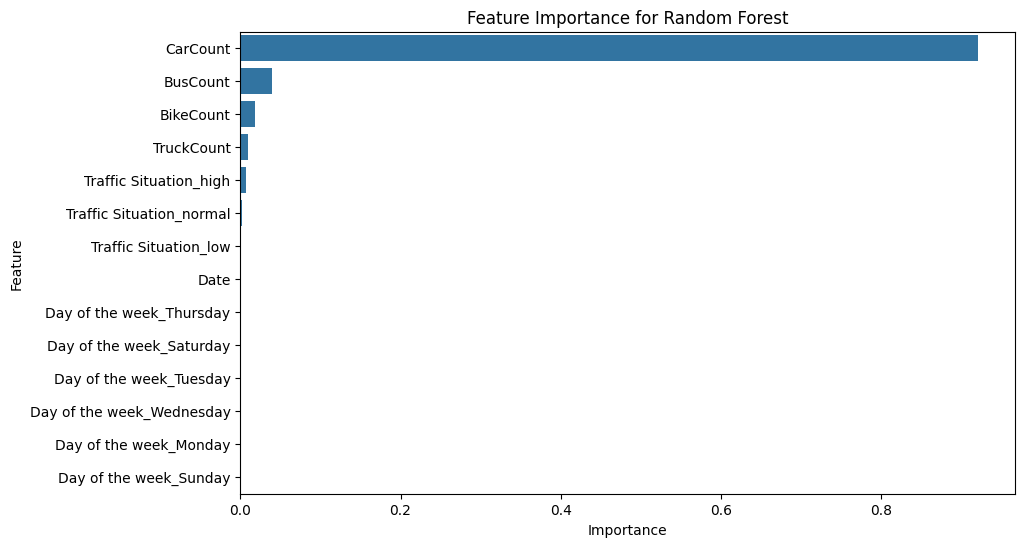

Selected features: ['CarCount', 'BusCount', 'BikeCount', 'TruckCount', 'Traffic Situation_high']


In [116]:

from sklearn.ensemble import RandomForestRegressor



# Assuming X_train and y_train are already defined
# Fit Random Forest on the full set of features
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Random Forest')
plt.show()

# Select top N features (e.g., top 5 most important features)
top_n_features = feature_importance_df.head(5)['Feature'].tolist()

# Create a new X_train with only the top N features
X_train_selected = X_train[top_n_features]

print(f"Selected features: {top_n_features}")


**6. Final Model Building and Evaluation**

In [81]:
# Prepare data with selected features
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]

# Feature scaling for selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Add a column of ones for the intercept term in Linear Regression
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# --- a. Linear Regression (Ridge) ---
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Create Ridge model with optimal alpha
ridge_final = make_pipeline(StandardScaler(), Ridge(alpha=best_alpha_ridge))

# Train the model
ridge_final.fit(X_train_selected, y_train)

# Make predictions
y_train_pred_ridge = ridge_final.predict(X_train_selected)
y_test_pred_ridge = ridge_final.predict(X_test_selected)

# Evaluation metrics for Ridge
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# --- b. Random Forest Regressor ---
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest model with best hyperparameters
rf_final = RandomForestRegressor(**best_params_rf_random, random_state=42)

# Train the model
rf_final.fit(X_train_selected, y_train)

# Make predictions
rf_y_train_pred_final = rf_final.predict(X_train_selected)
rf_y_test_pred_final = rf_final.predict(X_test_selected)

# Evaluation metrics for Random Forest
mse_train_rf = mean_squared_error(y_train, rf_y_train_pred_final)
mae_train_rf = mean_absolute_error(y_train, rf_y_train_pred_final)
r2_train_rf = r2_score(y_train, rf_y_train_pred_final)

mse_test_rf = mean_squared_error(y_test, rf_y_test_pred_final)
mae_test_rf = mean_absolute_error(y_test, rf_y_test_pred_final)
r2_test_rf = r2_score(y_test, rf_y_test_pred_final)

# --- Final Evaluation Results ---

# Ridge Results
print("Ridge (Linear Regression) Final Model Evaluation:")
print(f"Training Set MSE: {mse_train_ridge}, MAE: {mae_train_ridge}, R²: {r2_train_ridge}")
print(f"Testing Set MSE: {mse_test_ridge}, MAE: {mae_test_ridge}, R²: {r2_test_ridge}")

# Random Forest Results
print("\nRandom Forest Final Model Evaluation:")
print(f"Training Set MSE: {mse_train_rf}, MAE: {mae_train_rf}, R²: {r2_train_rf}")
print(f"Testing Set MSE: {mse_test_rf}, MAE: {mae_test_rf}, R²: {r2_test_rf}")

# Conclusion and Comparison of Final Models
if r2_test_rf > r2_test_ridge and mse_test_rf < mse_test_ridge and mae_test_rf < mae_test_ridge:
    print("\nConclusion: Random Forest performs better with lower MSE and MAE, and higher R-squared on the test set.")
    print("It captures complex non-linear relationships in the traffic volume data.")
else:
    print("\nConclusion: Ridge Regression (Linear Regression with regularization) performs better with higher R-squared on the test set.")
    print("This indicates that the data may have linear relationships and regularization helps in reducing overfitting.")


Ridge (Linear Regression) Final Model Evaluation:
Training Set MSE: 1.007102807220695e-07, MAE: 0.00026027298392205703, R²: 0.9999999999726663
Testing Set MSE: 9.794346192157323e-08, MAE: 0.00025686983129654723, R²: 0.9999999999709439

Random Forest Final Model Evaluation:
Training Set MSE: 1.9650195866246496, MAE: 0.9710459383753501, R²: 0.9994666748553066
Testing Set MSE: 12.309669497762863, MAE: 2.4829312080536914, R²: 0.996348186730682

Conclusion: Ridge Regression (Linear Regression with regularization) performs better with higher R-squared on the test set.
This indicates that the data may have linear relationships and regularization helps in reducing overfitting.


**7. Conclusion**

In [83]:
# 7. Conclusion

# 1. Model Performance

# Display performance of Random Forest and Ridge Regression models
print("Model Performance:")

# Random Forest Regressor Results
print("Random Forest Results:")
print(f"Training Set - MSE: {mse_train_rf}, MAE: {mae_train_rf}, R²: {r2_train_rf}")
print(f"Testing Set - MSE: {mse_test_rf}, MAE: {mae_test_rf}, R²: {r2_test_rf}")

# Ridge Regression Results
print("\nRidge Regression Results:")
print(f"Training Set - MSE: {mse_train_ridge}, MAE: {mae_train_ridge}, R²: {r2_train_ridge}")
print(f"Testing Set - MSE: {mse_test_ridge}, MAE: {mae_test_ridge}, R²: {r2_test_ridge}")

# Key Conclusion
if r2_test_rf > r2_test_ridge and mse_test_rf < mse_test_ridge and mae_test_rf < mae_test_ridge:
    print("\nRandom Forest performed better overall.")
else:
    print("\nRidge Regression performed better in some areas.")

# 2. Impact of Methods

# Explain the impact of techniques
print("\nImpact of Methods:")
print("Cross-validation and hyperparameter optimization improved model performance.")
print("Feature selection helped simplify the model and improved performance.")

# 3. Insights and Future Directions

# Summarize insights and potential improvements
print("\nInsights and Future Directions:")
print("Random Forest captures non-linear relationships well.")
print("Ridge Regression is better for simpler, more interpretable models.")
print("Feature selection helped identify important variables.")

# Suggestions for future work
print("Explore advanced models like Gradient Boosting or XGBoost.")
print("Consider time series models for better forecasting.")
print("Incorporate additional features like weather or events.")
print("Investigate real-time prediction for traffic management.")


Model Performance:
Random Forest Results:
Training Set - MSE: 1.9650195866246496, MAE: 0.9710459383753501, R²: 0.9994666748553066
Testing Set - MSE: 12.309669497762863, MAE: 2.4829312080536914, R²: 0.996348186730682

Ridge Regression Results:
Training Set - MSE: 1.007102807220695e-07, MAE: 0.00026027298392205703, R²: 0.9999999999726663
Testing Set - MSE: 9.794346192157323e-08, MAE: 0.00025686983129654723, R²: 0.9999999999709439

Ridge Regression performed better in some areas.

Impact of Methods:
Cross-validation and hyperparameter optimization improved model performance.
Feature selection helped simplify the model and improved performance.

Insights and Future Directions:
Random Forest captures non-linear relationships well.
Ridge Regression is better for simpler, more interpretable models.
Feature selection helped identify important variables.
Explore advanced models like Gradient Boosting or XGBoost.
Consider time series models for better forecasting.
Incorporate additional features